# Turing Test Classroom Project — Analysis Notebook

## A Note on How This Was Built

This analysis notebook was created through **"vibe coding"** — which means I didn't have a strict plan from the start. Instead, I:
1. Started with questions and ideas about what we wanted to learn
2. Tried different things, tested them out, and kept what worked
3. Threw away things that didn't work and tried something new
4. Iterated (repeated and improved) until the analysis made sense

**This process was hard!** There were many moments of:
- "That didn't work, let's try something else"
- "Wait, I need to reorganize the data differently"
- "Let me clean this up and make it clearer for judges"

But through that messy, iterative process, we ended up with something really cool: **a clear story about AI and how human it sounds!**

The point is: **coding and data analysis aren't always about having the perfect plan. Sometimes the best work comes from trying, learning, and improving as you go.** We think that's pretty real and authentic, and we wanted to be transparent about it.

---

## What is the Turing Test?

The **Turing Test** is a famous challenge in computer science that asks: "Can a machine think like a human?"

Imagine you're texting with someone, but you don't know if they're a real person or a computer. If you can't tell the difference, the computer has passed the Turing Test! In this project, we gave students responses to questions from three sources:

1. **Real Humans** — answers written by actual people
2. **ChatGPT** — answers written by an AI made by OpenAI
3. **Gemini** — answers written by an AI made by Google

## The Challenge

We asked: **Which AI sounds the most human?**

Students ranked each answer on a scale from 1 to 9, where:
- **1 = Most human-sounding** (they thought it came from a real person)
- **9 = Least human-sounding** (they were sure it was AI)

## What You'll See in These Graphs

This notebook shows four different visualizations (charts and graphs) that tell the story of our results:

- **Figure 1** — Which answers fooled the most students into thinking they were human?
- **Figure 2** — Which AI sounds more human overall—ChatGPT or Gemini? How do they compare to real humans?
- **Figure 3** — Looking at all 9 specific answers individually, which ones sounded the most human?
- **Figure 4** — What percentage of students thought each answer came from a real person?

All figures are saved at high quality (300 DPI) for printing and presentations.

---

## The 9 Questions We Tested

Here are all the questions students ranked, organized by which source (Human, ChatGPT, or Gemini) provided the answer:

| # | Question | Source |
|---|----------|--------|
| 1 | "I like sushi because it's good and it really gets me to eat seafood." | **Human** |
| 2 | "I really like pepperoni pizza because you can get it almost anywhere and it always tastes good." | **Gemini** |
| 3 | "My favorite food is pizza because it's always good no matter what." | **ChatGPT** |
| 4 | "I like catfish because its super easy to catch and its really good" | **Human** |
| 5 | "I like mac and cheese because it tastes really good and is easy to make." | **ChatGPT** |
| 6 | "My favorite food is definitely sushi because I love seafood." | **Gemini** |
| 7 | "I like steak because its good and yeah." | **Human** |
| 8 | "My favorite food is chicken nuggets because they're quick to eat and never disappoint." | **ChatGPT** |
| 9 | "I honestly love spicy wings the most because I really like hot food." | **Gemini** |

---


## Setup and Configuration

Before we can analyze our data, we need to:
1. **Import libraries** — special tools that help us work with data and create graphs
2. **Set up file paths** — tell Python where to find our data file and where to save our results

Think of this like getting all your supplies ready before starting a project!


In [72]:

# Standard library imports
from pathlib import Path

# Third-party imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define input and output directories
data_dir = Path('..')/'data'/'raw'
out_dir = Path('..')/'outputs'/'figures'

# Create output directory if it doesn't exist
out_dir.mkdir(parents=True, exist_ok=True)

# Path to hand-keyed survey data file
handkeyed_file_path = data_dir/'survey_results_handkeyed.xlsx'


## Load the Survey Data

Now we load the data file that has all the student responses.

In this file, each row represents one student, and each column shows how they ranked one of our 9 answers. We need to read this data into our program so we can analyze it.


In [73]:

# Load raw hand-keyed survey responses from Excel file
raw_data = pd.read_excel(handkeyed_file_path)


## Reshape the Data for Analysis

Right now, our data is organized like a table where:
- **Rows** = students
- **Columns** = the 9 answers they ranked

But we need to reorganize it so we can ask questions like: "What was the average rank for Answer #5?"

We'll reshape it so:
- **Each row** = one student's ranking for ONE answer
- **Columns** = Student ID, Answer Number, Which Source it came from, What rank they gave it

This makes it much easier to group and compare!


In [74]:

# Reshape data: create one row per (question, source, participant, rank) combination
long_data = raw_data.melt(
    id_vars=['Question #', 'Question Text', 'Source'],
    var_name='Participant',
    value_name='Rank'
)

# Convert Rank column to numeric, treating non-numeric values as NaN
long_data['Rank'] = pd.to_numeric(long_data['Rank'], errors='coerce')

# Remove rows with missing rank values
long_data = long_data.dropna(subset=['Rank'])

## Protect Student Privacy

Before we show our results to anyone, we need to make sure **no one can identify which student gave which answer**.

Instead of using students' real names, we'll replace them with anonymous IDs like "P001," "P002," etc. This way:
- The analysis still works perfectly
- No student is identified
- Student privacy is protected

It's the same reason tests and surveys often use anonymous codes!


In [75]:

# Create mapping: original participant ID -> anonymous ID (P001, P002, ...)
participant_name_map = {
    original_name: f'P{i:03d}'
    for i, original_name in enumerate(long_data['Participant'].unique(), 1)
}

# Apply mapping to replace all participant identifiers with anonymous IDs
long_data['Participant'] = long_data['Participant'].map(participant_name_map)

# Display a sample of the data
long_data.head(9)


,Question #,Question Text,Source,Participant,Rank
0,1,I like sushi because it's good and it really g...,Human,P001,8.0
1,2,I really like pepperoni pizza because you can ...,Gemini,P001,3.0
2,3,My favorite food is pizza because it's always ...,ChatGPT,P001,4.0
3,4,I like catfish because its super easy to catch...,Human,P001,9.0
4,5,I like mac and cheese because it tastes really...,ChatGPT,P001,1.0
5,6,My favorite food is definitely sushi because I...,Gemini,P001,2.0
6,7,I like steak because its good and yeah.,Human,P001,6.0
7,8,My favorite food is chicken nuggets because th...,ChatGPT,P001,5.0
8,9,I honestly love spicy wings the most because I...,Gemini,P001,7.0


## Setting Up Our Graphs

Now that our data is ready, we need to prepare our graphs:

1. **Choose colors** — We'll use a pretty pastel color scheme with:
   - **Pink** for real human answers
   - **Lavender** for ChatGPT answers
   - **Lilac** for Gemini answers

2. **Create a save function** — This is a shortcut command that saves our graphs at high quality so they look great when printed

Think of this as picking your markers and getting your poster board ready before you start drawing!


In [76]:

# Color palette: preppy pastel theme (one color per response source)
# Hex codes sampled from custom color swatches for visual consistency
color_palette = {
    'Human':  '#EDDAEC',   # Blush pink (human responses)
    'ChatGPT': '#CDC3E5',  # Lavender (ChatGPT responses)
    'Gemini': '#DCD5EC',   # Powder lilac (Gemini responses)
}

def save_figure(figure_name):
    """
    Save the current matplotlib figure to the output directory at poster-quality resolution.

    Parameters
    ----------
    figure_name : str
        Filename to save (e.g., 'fig1_rank1_share.png')

    Notes
    -----
    - Saves at 300 DPI (suitable for printing/posters)
    - Uses tight bounding box to minimize whitespace
    - Prints confirmation message with full path
    """
    figure_path = out_dir / figure_name
    plt.savefig(figure_path, dpi=300, bbox_inches='tight')
    print(f'Saved: {figure_path}')



## Figure 1 — Which Source Fooled Students the Most?

### What This Graph Shows

In our test, students picked **one answer they thought came from a real human**. This graph shows:
- What **percentage** of students thought each source was human
- **Human** = the percentage of #1 votes that went to real human answers
- **ChatGPT** = the percentage of #1 votes that went to ChatGPT answers
- **Gemini** = the percentage of #1 votes that went to Gemini answers

### Why It Matters

If students are randomly guessing, each source should get about **33%** of the votes (since there are 3 sources).
If one AI gets much more than 33%, it means that AI sounded very human!
If real humans get less than 33%, it means our AI is fooling students!


### How We Make This Graph

Here's what we do step-by-step:
1. **Filter** — Keep only the answers students ranked as #1 (most human)
2. **Count** — How many #1 votes did each source get?
3. **Calculate percentages** — What percentage of all #1 votes did each source get?
4. **Create the bar chart** — Draw bars showing these percentages
5. **Add labels** — Put the exact percentage on top of each bar so it's easy to read


Saved: ..\outputs\figures\fig1_rank1_share.png


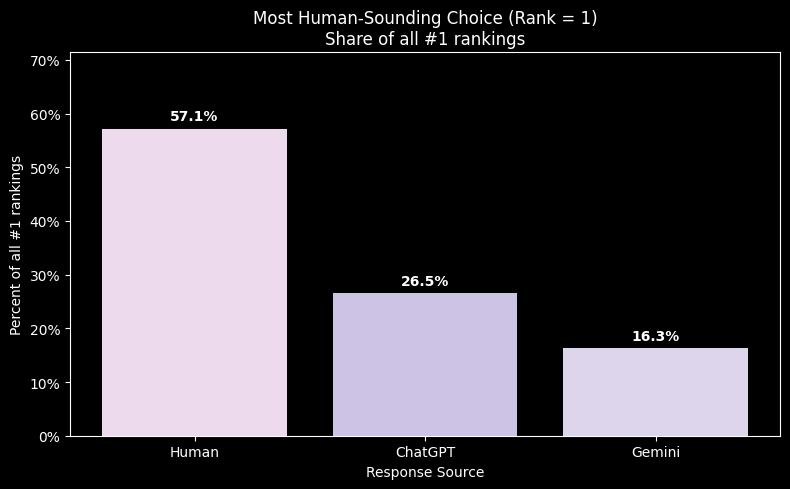

In [77]:
# Filter data to only rows where Rank = 1 (most human-sounding selections)
rank_1_data = long_data[long_data['Rank'] == 1]

# Count #1 rankings by source
rank_1_counts = rank_1_data.groupby('Source').size()

# Calculate percentage share (normalized to sum to 100%)
rank_1_share = (rank_1_counts / rank_1_counts.sum()).sort_values(ascending=False)

# Create figure and bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(
    rank_1_share.index,
    rank_1_share.values,
    color=[color_palette[source] for source in rank_1_share.index]
)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Set title and axis labels
plt.title('Most Human-Sounding Choice (Rank = 1)\nShare of all #1 rankings')
plt.xlabel('Response Source')
plt.ylabel('Percent of all #1 rankings')

# Set y-axis limits with 25% padding at top for label space
plt.ylim(0, max(rank_1_share.values) * 1.25)

# Add percentage labels on top of each bar
for bar, percentage_value in zip(bars, rank_1_share.values):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = percentage_value
    plt.text(
        bar_x,
        bar_height + 0.01,
        f'{percentage_value * 100:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
save_figure('fig1_rank1_share.png')
plt.show()


## Figure 2 — Overall: Which Source Sounds the Most Human?

### What This Graph Shows

This graph takes **all the rankings students gave** and finds the **average (mean) score** for each source:
- If the average is **close to 1**, students thought that source sounded very human
- If the average is **close to 9**, students thought that source sounded very robotic/AI-like
- A **lower number is better** — it means students were fooled!

### How to Read It

Imagine your class took a test:
- If the average score is 85%, that's pretty good
- If the average score is 92%, that's excellent

Same idea here:
- If ChatGPT's average rank is **3.2** and Human's is **4.5**, that means ChatGPT sounded more human overall

### Why It Matters

This shows us **which source was the best at sounding human** when you average all the answers together.


### How We Make This Graph

Here's what we do step-by-step:
1. **Group by source** — Organize all answers by whether they came from Human, ChatGPT, or Gemini
2. **Calculate average** — Find the average rank for each source (add all ranks, divide by how many)
3. **Sort** — Put them in order from best (lowest) to worst (highest)
4. **Create the bar chart** — Draw bars showing the average rank for each source
5. **Add labels** — Put the exact average number on top of each bar


Saved: ..\outputs\figures\fig2_avg_rank_by_source.png


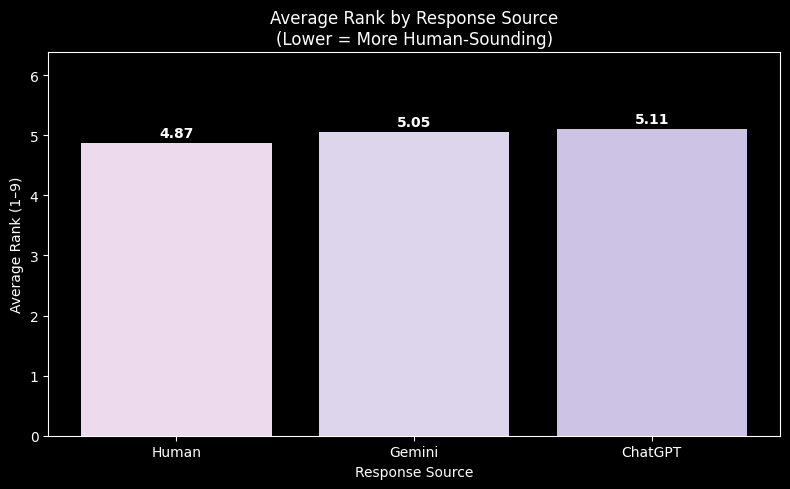

In [78]:
# Calculate mean rank for each source
# groupby('Source') groups all responses by their source
# ['Rank'].mean() computes the average rank for each group
# sort_values() orders sources by average rank (lowest first = most human)
mean_rank_by_source = long_data.groupby('Source')['Rank'].mean().sort_values()

# Create figure and bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(
    mean_rank_by_source.index,
    mean_rank_by_source.values,
    color=[color_palette[source] for source in mean_rank_by_source.index]
)

# Set title and axis labels
plt.title('Average Rank by Response Source\n(Lower = More Human-Sounding)')
plt.xlabel('Response Source')
plt.ylabel('Average Rank (1–9)')

# Set y-axis limits with 25% padding at top for label space
plt.ylim(0, max(mean_rank_by_source.values) * 1.25)

# Add average rank value labels on top of each bar
for bar, rank_value in zip(bars, mean_rank_by_source.values):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = rank_value
    plt.text(
        bar_x,
        bar_height + 0.05,
        f'{rank_value:.2f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
save_figure('fig2_avg_rank_by_source.png')
plt.show()


## Figure 3 — Which Individual Answers Sounded Most Human?

### What This Graph Shows

Instead of looking at **all answers combined** (like in Figure 2), this graph looks at **each individual answer** one by one.

Remember, there were **9 answers total**:
- **Answers 1, 2, 3** came from a Real Human
- **Answers 4, 5, 6** came from ChatGPT
- **Answers 7, 8, 9** came from Gemini

Each bar shows the average rank for **one specific answer**. The **color** tells you which source it came from:
- **Pink** = Real Human
- **Lavender** = ChatGPT
- **Lilac** = Gemini

### Why It Matters

Some answers fooled students more than others! For example:
- Answer #5 might have an average rank of 2.1 (very human-sounding!)
- Answer #3 might have an average rank of 5.8 (students were pretty sure it was AI)

This helps us see which **specific answers** were the best at fooling people, not just which source overall.


### How We Make This Graph

Here's what we do step-by-step:
1. **Group by answer** — Organize the data so we look at each answer individually
2. **Calculate average** — Find the average rank for each answer
3. **Sort** — Put them in order from answer 1 to 9
4. **Create the bar chart** — Draw 9 bars, one for each answer
5. **Color code** — Use pink for human answers, lavender for ChatGPT, lilac for Gemini
6. **Add labels** — Show the source name and average rank on top of each bar


Saved: ..\outputs\figures\fig3_avg_rank_each_response.png


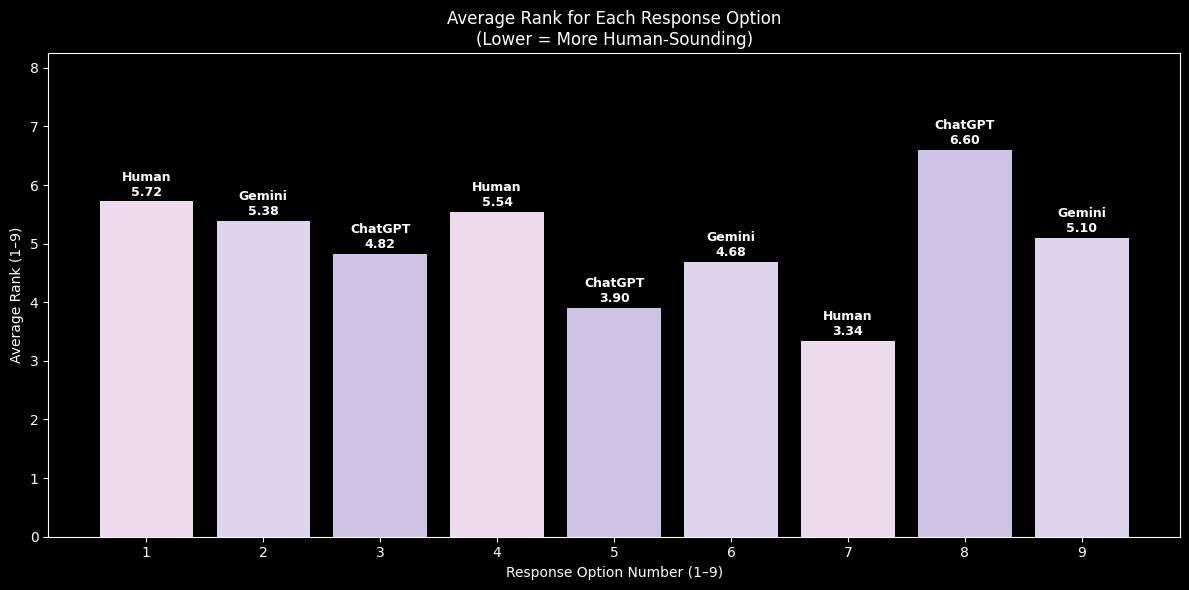

In [79]:
# Calculate mean rank for each response option and source
# groupby(['Question #', 'Question Text', 'Source']) creates groups for each unique response option
# ['Rank'].mean() computes average rank within each group
# reset_index() converts grouped output back to a regular DataFrame
mean_rank_by_response = (
    long_data.groupby(['Question #', 'Question Text', 'Source'])['Rank']
    .mean()
    .reset_index()
)

# Convert Question # to integer for proper sorting (1, 2, 3... not 1, 10, 2...)
mean_rank_by_response['Question #'] = mean_rank_by_response['Question #'].astype(int)

# Sort by question number for logical x-axis ordering
mean_rank_by_response = mean_rank_by_response.sort_values('Question #')

# Create figure and prepare data for bar chart
plt.figure(figsize=(12, 6))

# Convert question numbers to string labels for x-axis
response_labels = mean_rank_by_response['Question #'].astype(str)

# Map each response to its source color
bar_colors = [color_palette[source] for source in mean_rank_by_response['Source']]

# Create bar chart
bars = plt.bar(response_labels, mean_rank_by_response['Rank'], color=bar_colors)

# Set title and axis labels
plt.title('Average Rank for Each Response Option\n(Lower = More Human-Sounding)')
plt.xlabel('Response Option Number (1–9)')
plt.ylabel('Average Rank (1–9)')

# Set y-axis limits with 25% padding at top for label space
plt.ylim(0, max(mean_rank_by_response['Rank']) * 1.25)

# Add labels on top of bars showing source and rank value
for bar, source, rank_value in zip(bars, mean_rank_by_response['Source'], mean_rank_by_response['Rank']):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = rank_value
    plt.text(
        bar_x,
        bar_height + 0.05,
        f'{source}\n{rank_value:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
save_figure('fig3_avg_rank_each_response.png')
plt.show()


## Figure 4 — Which Answers Fooled the Most Students?

### What This Graph Shows

This graph shows **what percentage of students thought each answer came from a real human** (picked it as #1).

For example:
- If 60% of students picked Answer #5 as "most human," the bar for Answer #5 shows 60%
- If only 10% of students picked Answer #2 as "most human," the bar for Answer #2 shows 10%

The **color** tells you which source it came from (same as Figure 3):
- **Pink** = Real Human
- **Lavender** = ChatGPT
- **Lilac** = Gemini

### How to Read It

**Tall bars = answers that fooled lots of students**
**Short bars = answers that most students correctly identified as AI**

For example:
- A bar that reaches 70% means 7 out of 10 students thought it was human
- A bar that reaches 20% means only 2 out of 10 students thought it was human

### Why It Matters

This shows us which **specific answers were the trickiest**. If a ChatGPT answer gets 80%, that AI is really good at fooling people!
If a real human answer only gets 20%, students might not have thought it sounded very natural.


### How We Make This Graph

Here's what we do step-by-step:
1. **Mark #1 answers** — Create a list that marks which answers were picked as #1 (True) and which weren't (False)
2. **Group by answer** — Organize the data so we look at each answer individually
3. **Calculate percentage** — Find what percentage of students picked each answer as #1
4. **Create the bar chart** — Draw 9 bars, one for each answer, showing the percentage
5. **Color code** — Use pink for human answers, lavender for ChatGPT, lilac for Gemini
6. **Add labels** — Show the exact percentage on top of each bar


Saved: ..\outputs\figures\fig4_pct_rank1_each_response.png


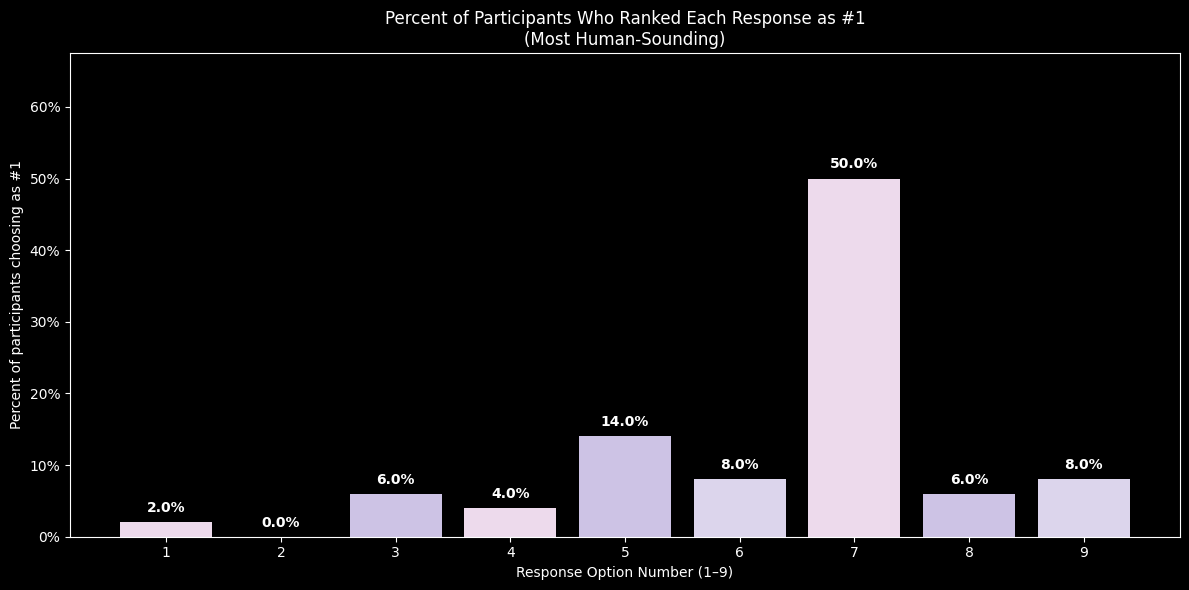

In [80]:
# Create binary indicator: is_rank_1 = True if Rank == 1, False otherwise
# groupby(['Question #', 'Question Text', 'Source']) creates groups for each response option
# ['is_rank_1'].mean() gives the fraction of participants who ranked that option as #1
# reset_index() converts grouped output back to a regular DataFrame
percent_rank_1_by_response = (
    long_data
    .assign(is_rank_1=long_data['Rank'] == 1)
    .groupby(['Question #', 'Question Text', 'Source'])['is_rank_1']
    .mean()
    .reset_index()
)

# Convert Question # to integer for proper sorting (1, 2, 3... not 1, 10, 2...)
percent_rank_1_by_response['Question #'] = percent_rank_1_by_response['Question #'].astype(int)

# Sort by question number for logical x-axis ordering
percent_rank_1_by_response = percent_rank_1_by_response.sort_values('Question #')

# Create figure and prepare data for bar chart
plt.figure(figsize=(12, 6))

# Convert question numbers to string labels for x-axis
response_labels = percent_rank_1_by_response['Question #'].astype(str)

# Map each response to its source color
bar_colors = [color_palette[source] for source in percent_rank_1_by_response['Source']]

# Create bar chart
bars = plt.bar(response_labels, percent_rank_1_by_response['is_rank_1'], color=bar_colors)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Set title and axis labels
plt.title('Percent of Participants Who Ranked Each Response as #1\n(Most Human-Sounding)')
plt.xlabel('Response Option Number (1–9)')
plt.ylabel('Percent of participants choosing as #1')

# Set y-axis limits dynamically, with 35% padding at top for label space
# Handle edge case where max value is 0
max_percent = percent_rank_1_by_response['is_rank_1'].max()
y_limit = max_percent * 1.35 if max_percent > 0 else 0.3
plt.ylim(0, y_limit)

# Add percentage labels on top of each bar
for bar, percent_value in zip(bars, percent_rank_1_by_response['is_rank_1']):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = percent_value
    plt.text(
        bar_x,
        bar_height + 0.01,
        f'{percent_value * 100:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
save_figure('fig4_pct_rank1_each_response.png')
plt.show()
